In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


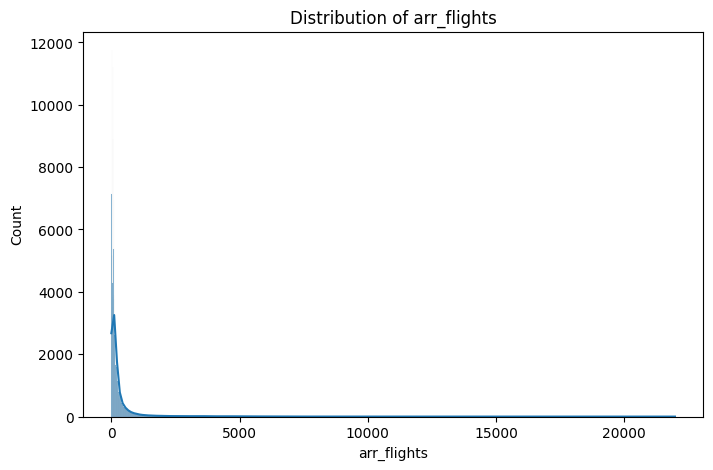

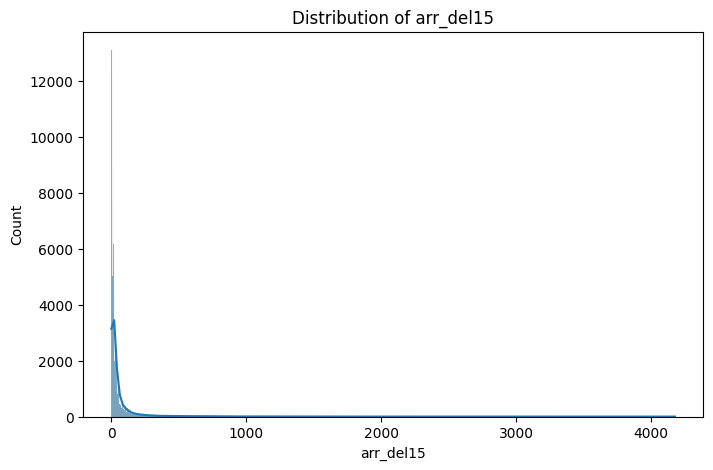

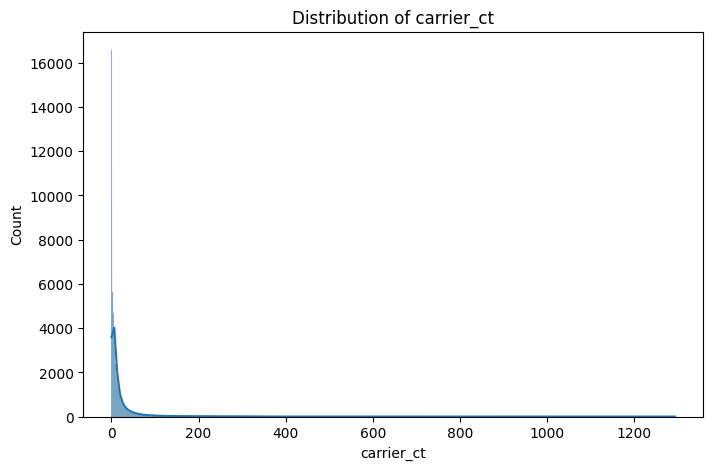

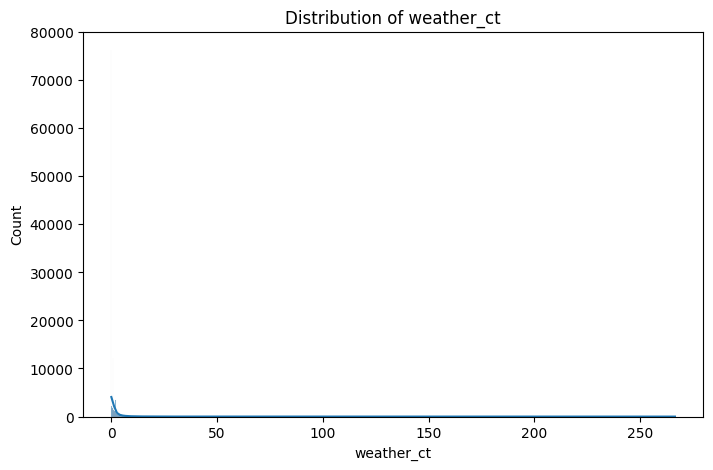

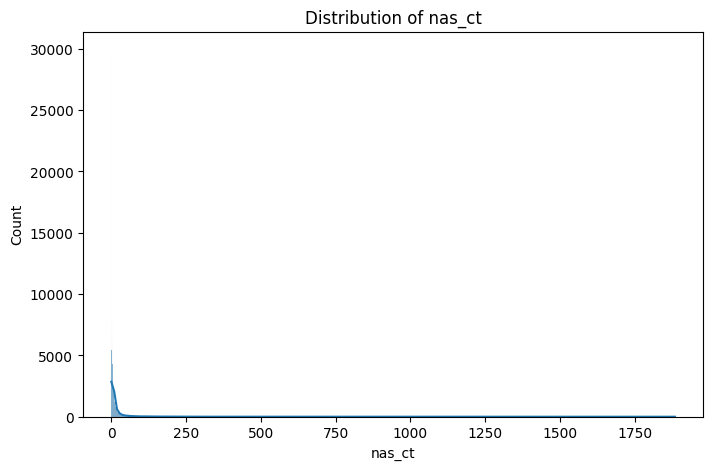

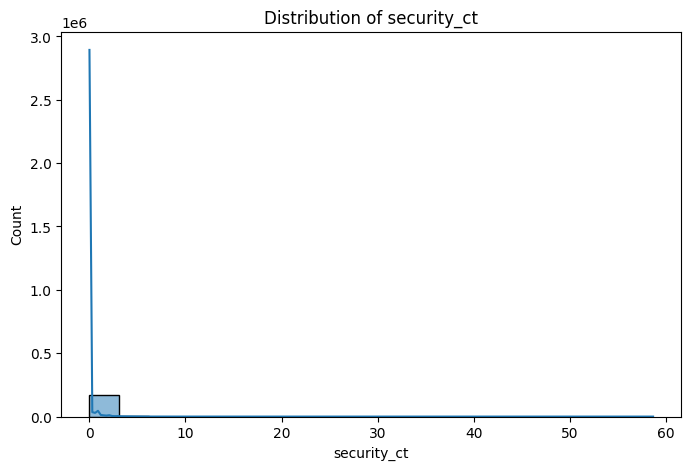

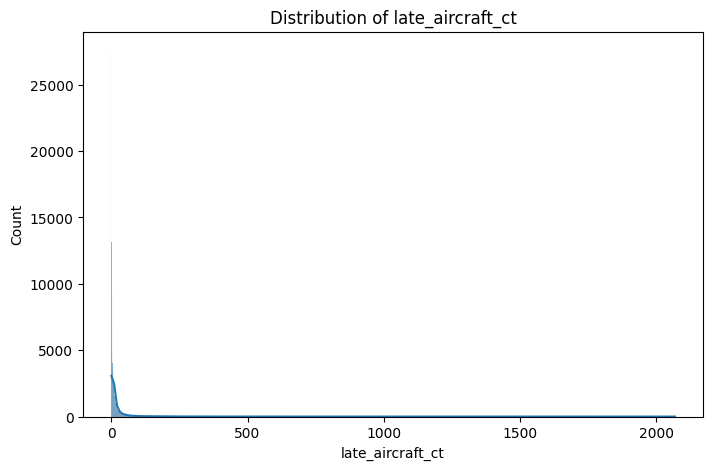

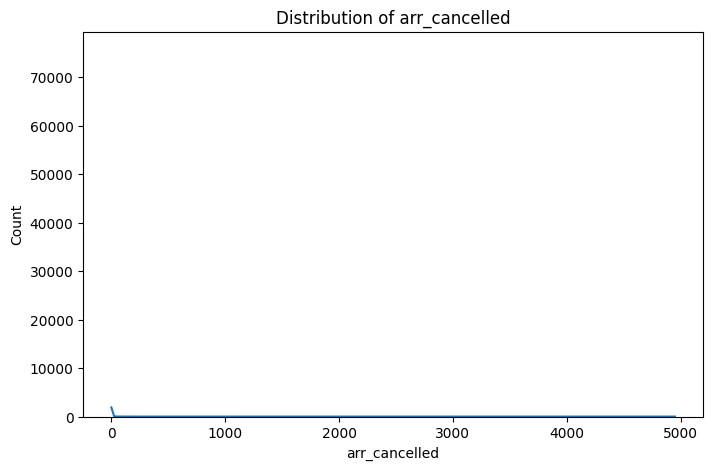

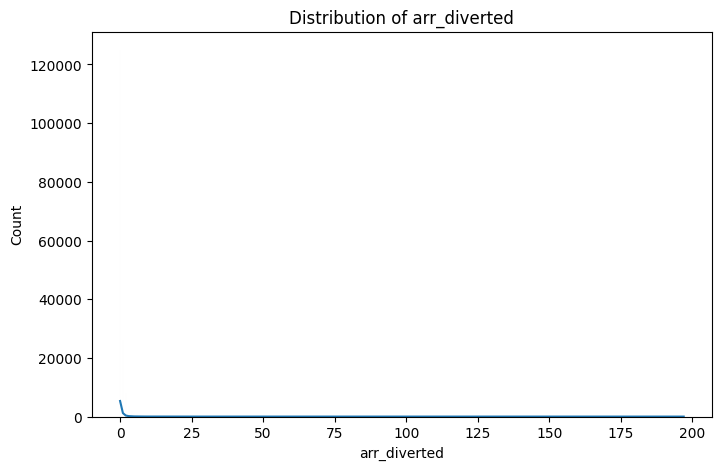

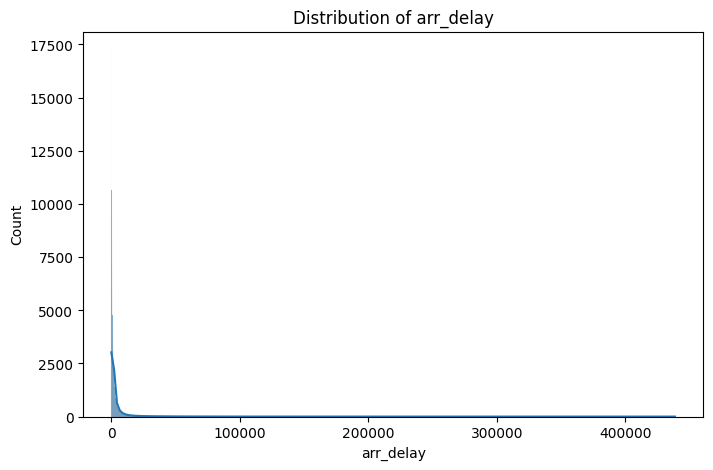

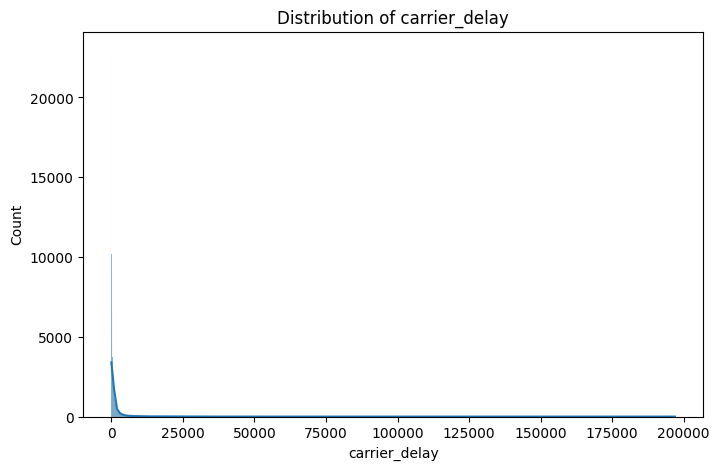

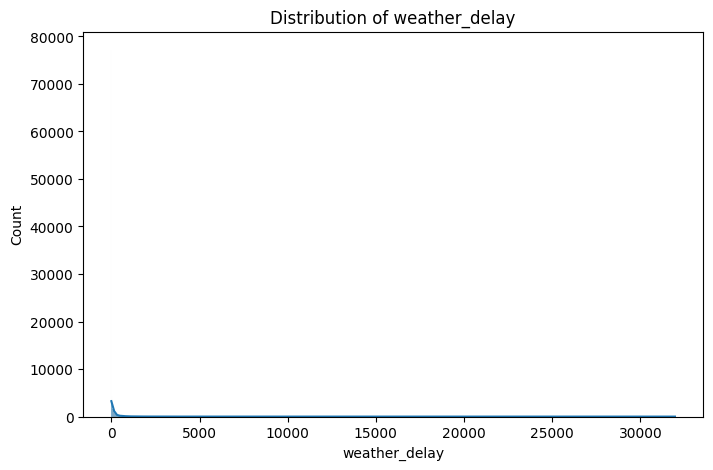

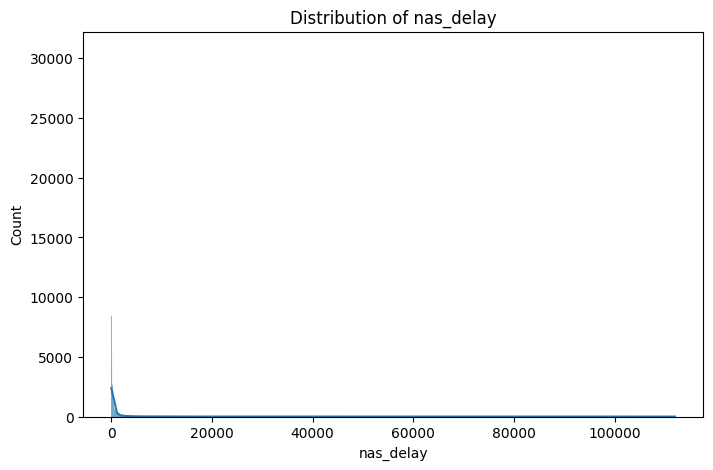

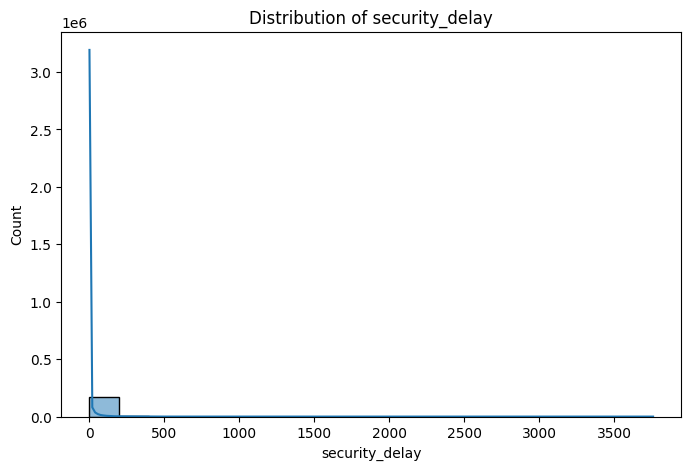

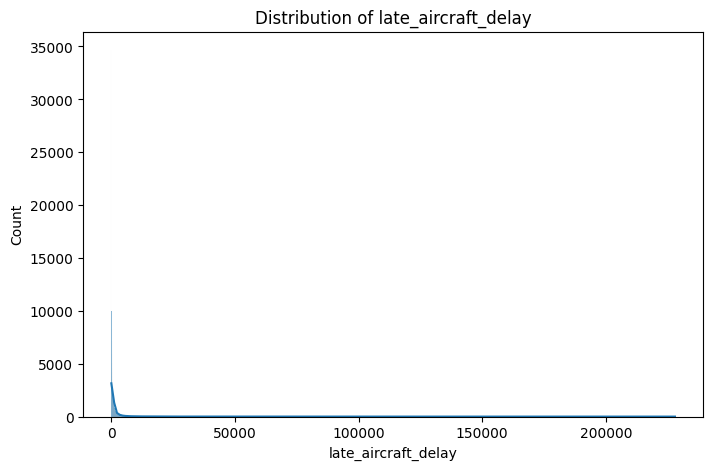

In [6]:
# Distribution of Numeric Features
numeric_features = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
                    'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
                    'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
                    'security_delay', 'late_aircraft_delay']

for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

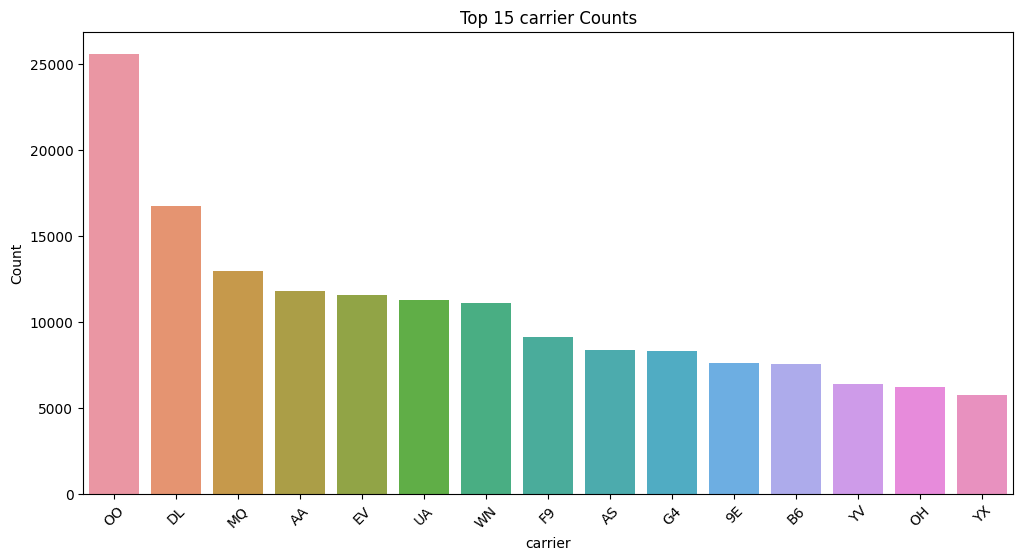

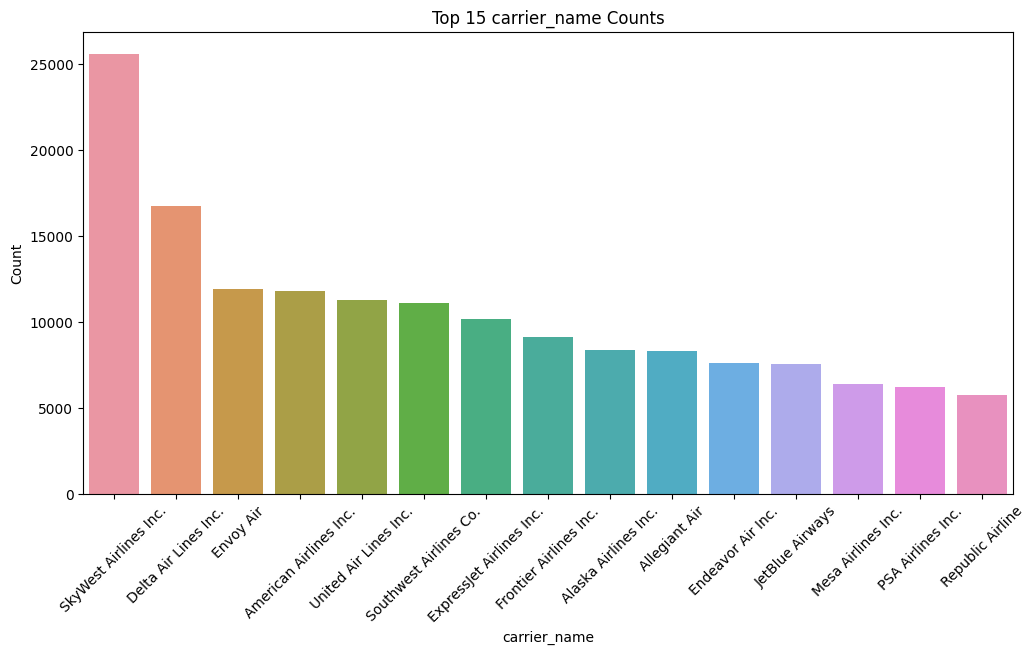

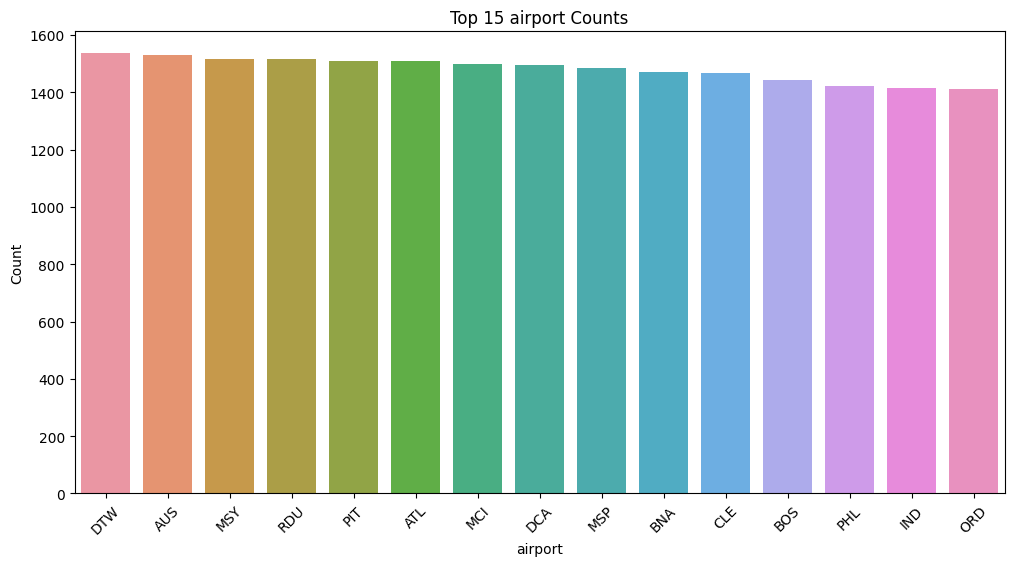

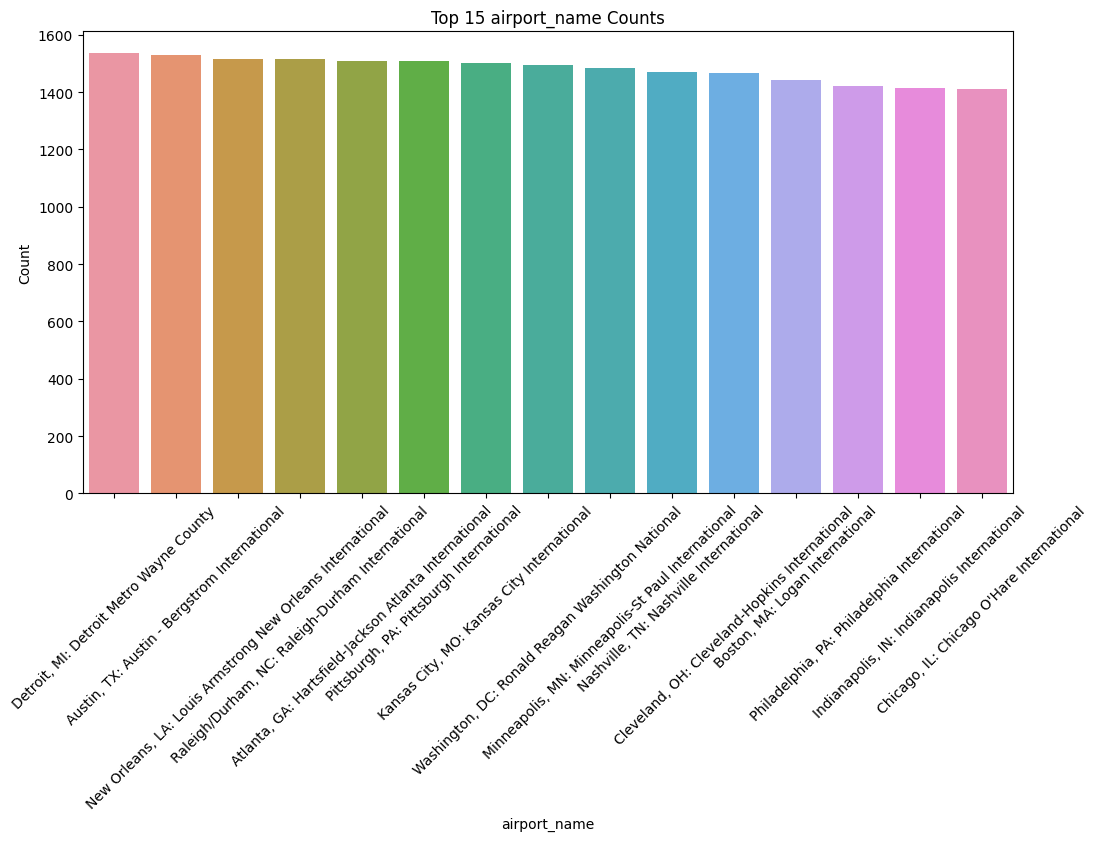

In [7]:
# Categorical Features
categorical_features = ['carrier', 'carrier_name', 'airport', 'airport_name']

for feature in categorical_features:
    top_categories = df[feature].value_counts().nlargest(15)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_categories.index, y=top_categories.values)
    plt.title(f'Top {15} {feature} Counts')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

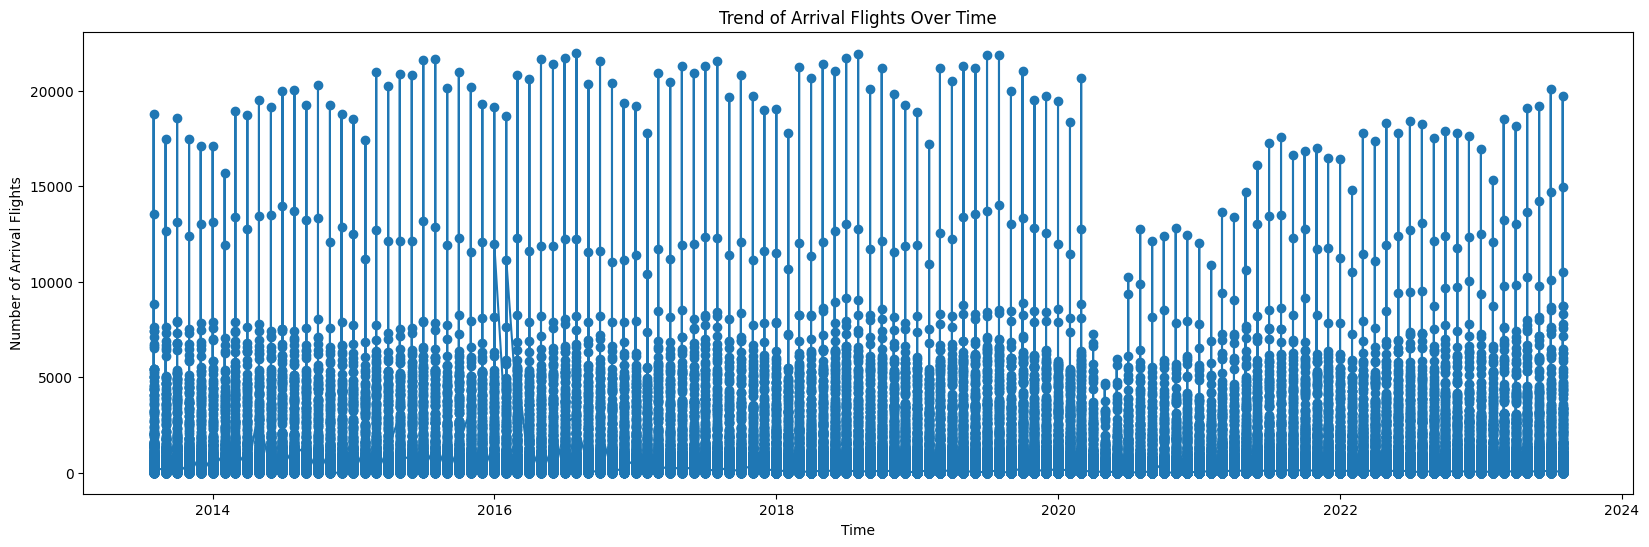

In [8]:
# Time Series Analysis
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('date', inplace=True)

# Fill missing values with the median of 'arr_flights'
df['arr_flights'].fillna(df['arr_flights'].median(), inplace=True)

# Example: Trend of 'arr_flights' over time
plt.figure(figsize=(20, 6))
plt.plot(df['arr_flights'], marker='o', linestyle='-')
plt.title('Trend of Arrival Flights Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Arrival Flights')
plt.show()


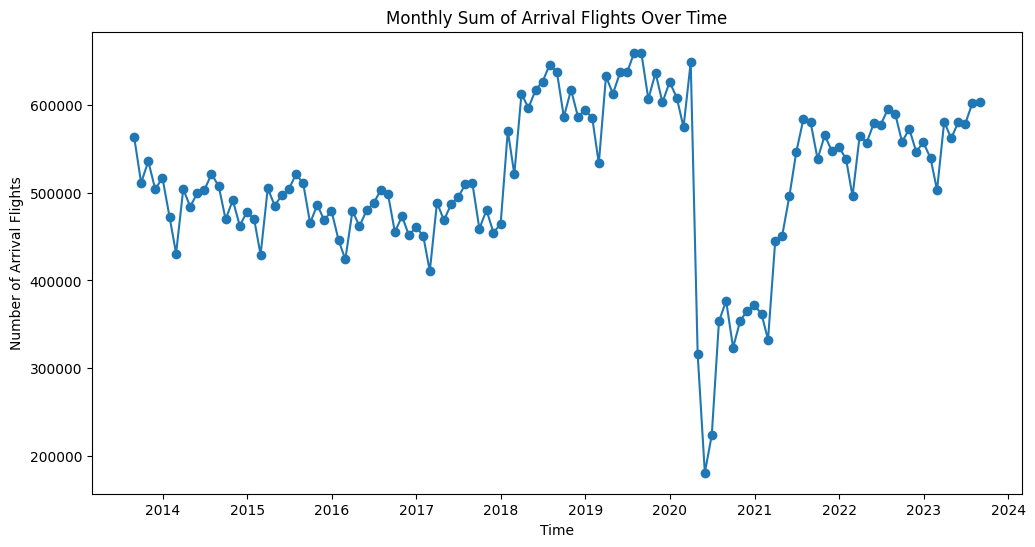

In [9]:
# Monthly Aggregations
monthly_df = df.resample('M').sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_df['arr_flights'], marker='o', linestyle='-')
plt.title('Monthly Sum of Arrival Flights Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Arrival Flights')
plt.show()

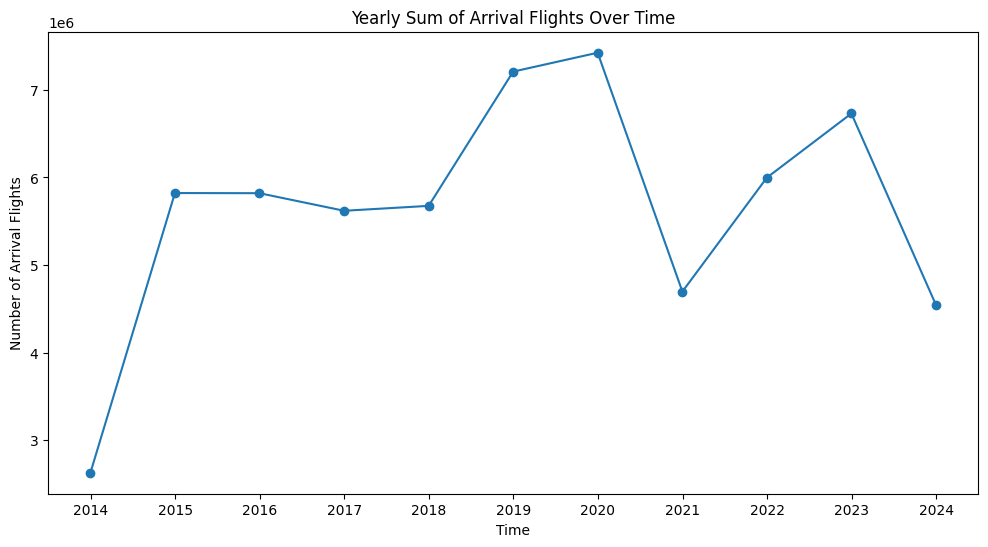

In [10]:
# Yearly Aggregations
yearly_df = df.resample('Y').sum()
plt.figure(figsize=(12, 6))
plt.plot(yearly_df['arr_flights'], marker='o', linestyle='-')
plt.title('Yearly Sum of Arrival Flights Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Arrival Flights')
plt.show()

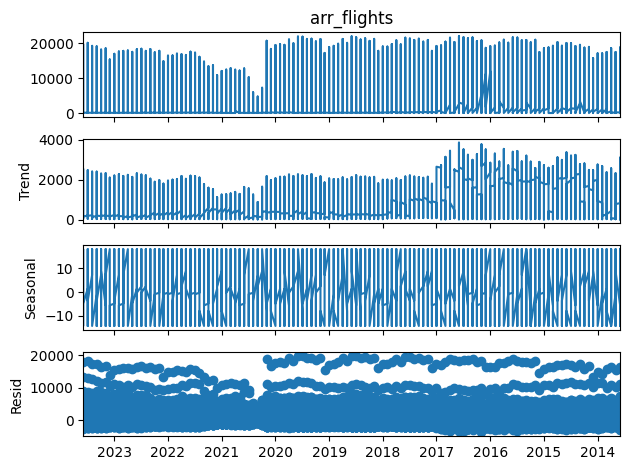

In [11]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['arr_flights'], model='additive', period=12)
result.plot()
plt.show()